<a href="https://colab.research.google.com/github/kskrao219/NLP/blob/main/NLP_ETD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TOKENISATION
->PROCESS OF SPLITTING A TEXT OBJECT INTO SMALLER UNITS (TOKENS) ->WHITESPACE,COMMA,COLON ETC

NORMALIZATION
->PREFIX+ MORPHEME +SUFFIX ->PROCESS OF CONVERTING TOKEN INTO BASE WORD ->STEMMING ->ELEMENTERAY RULE BASED PROCESS OF REMOVAL OF INFLECTIONAL FORMS OF TOKEN

CORPUS>DOCUMENTS>PARAGRAPHS>SENTENCES>TOKENS
TOKENTS- SMALLER UNITS OFTEXTS(WORDS,PHRASES,NGRAMS)
NGRAMS -COMBINATION OF N WORDS

In [ ]:
#EXPLORING TEXT DATA
import pandas as pd

In [ ]:
dataset=pd.read_csv('tweets.xls',encoding = 'ISO-8859-1')

In [ ]:
dataset.head()

,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [ ]:
#GENERATE WORD FREQUENCY IN TEXT COLOUMN
#Let's first generate a frequency table of all the words present in all the tweets combined.
def gen_freq(text):
    #Will store the list of words
    word_list = []

    #Loop over all the tweets and extract words into word_list
    for tw_words in text.split():
        word_list.extend(tw_words)

    #Create word frequencies using word_list
    word_freq = pd.Series(word_list).value_counts()

    #Print top 20 words
    word_freq[:20]
    
    return word_freq

gen_freq(dataset.text.str)




RT                 11053
to                  7650
is                  5152
in                  4491
the                 4331
                   ...  
C#%,                   1
takng                  1
re:                    1
@vishwa_theking        1
intelligence           1
Length: 19601, dtype: int64

# **EDA using Word Clouds**


In [ ]:
pip install wordcloud

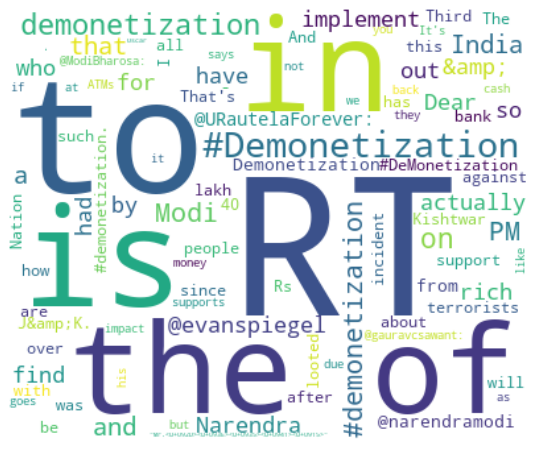

In [ ]:

#Import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Generate word frequencies
word_freq = gen_freq(dataset.text.str)

#Generate word cloud
wc = WordCloud(width=400, height=330, max_words=100, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Text Cleaning¶
import re
def clean_text(text):
    #Remove RT
    text = re.sub(r'RT', '', text)
    
    #Fix &
    text = re.sub(r'&amp;', '&', text)
    
    #Remove punctuations
    text = re.sub(r'[?!.;:,#@-]', '', text)

    #Convert to lowercase to maintain consistency
    text = text.lower()
    return text


In [ ]:
#stop words removal
from wordcloud import STOPWORDS

print(STOPWORDS)


{"doesn't", "they'd", 'or', "she'd", "i've", 'is', 'some', "we're", "we've", "she's", 'my', 'yourself', 'i', 'just', "shouldn't", 'that', 'http', "here's", "weren't", 'once', 'however', 'was', 'should', "they're", "i'd", 'same', 'myself', "he's", 'com', "don't", 'from', 'out', 'of', 'ourselves', 'has', 'we', 'doing', "didn't", "you'll", 'too', "let's", 'themselves', 'for', 'hers', "what's", 'being', 'any', 'do', 'can', "isn't", 'as', 'cannot', 'under', 'then', 'up', 'a', 'it', 'to', 'after', "she'll", "that's", 'them', "he'll", 'while', 'theirs', 'also', 'own', 'r', 'have', "they'll", 'ever', 'k', 'shall', 'before', 'such', 'its', 'did', 'when', "i'll", 'most', "who's", 'those', 'above', 'at', "mustn't", 'otherwise', "won't", 'www', 'your', 'she', 'whom', 'her', 'into', 'further', "wasn't", "you're", 'were', 'does', 'between', 'other', 'like', "it's", 'these', "we'd", "you've", "hadn't", 'about', 'until', 'having', 'been', 'he', "shan't", 'only', 'himself', 'very', 'am', 'both', 'down'

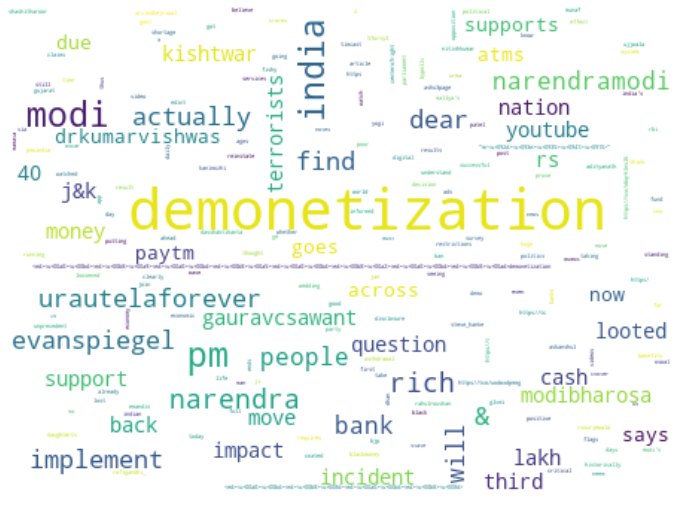

In [ ]:
text = dataset.text.apply(lambda x: clean_text(x))
word_freq = gen_freq(text.str)*100
word_freq = word_freq.drop(labels=STOPWORDS, errors='ignore')

#Generate word cloud
wc = WordCloud(width=450, height=330, max_words=200, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 14))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
